# Итоговая лабораторная работа.
Создание модели для прогнозирования по датасету finance_dataset.csv

Данные состоят из: Возраст, Доход, Сумма кредита, Кредитный рейтинг и Сбережения, на основе которых отображается Финансовое положение человека.

Данные в файле:

Age - Возраст

Income - Доход

Loan_Amount - Сумма кредита

Credit_Score - Кредитный рейтинг

Savings - Сбережения

Financial_Status - Финансовый статус (финансовое положение человека)

______

Medium 68%
High 16%
Low 16%

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

## Чтение данных

In [2]:
data = pd.read_csv('finance_dataset.csv')

In [3]:
data.head()

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status
0,44,40607.526348,9496.572495,340.971402,11784.427355,Medium
1,38,36472.502685,8166.647185,327.250718,14438.107413,Medium
2,46,43013.094695,7326.960308,430.648580,13205.439458,Medium
3,55,55552.090235,12159.168444,557.483446,16771.707794,High
4,37,42985.892657,4419.834649,421.208116,13252.171820,Medium


## 1. Выбор и обоснование метрики для измерения качества.

В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи,написав краткое обоснование (1-2 предложения).


*1.1. Предложена метрика*

У нас задача классификации и несбалансированные данные Medium 68%, High 16%, Low 16%, наиболее подходящей метрикой будет F1-Score.

*1.2. Присутствует корректное обоснование*

Она учитывает как точность (precision), так и полноту (recall) классификационного анализа, что крайне полезно в ситуациях, когда классы могут быть несбалансированными.

F1-Score - позволяет оценить качество модели, принимая в расчет как положительные предсказания, так и те, которые модель пропустила. В нашем случае важно минимизировать как ложноположительные, так и ложноотрицательные предсказания, что она и отражает.

## Проведен EDA на своих данных.

В рамках данного пункта необходимопровести предварительный разведочный анализ своего набора данных.


*2.1. Рассмотрены базовые характеристики / статистики для набора данных*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Income            10000 non-null  float64
 2   Loan_Amount       10000 non-null  float64
 3   Credit_Score      10000 non-null  float64
 4   Savings           10000 non-null  float64
 5   Financial_Status  10000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,Age,Income,Loan_Amount,Credit_Score,Savings
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.471600,39539.270265,7869.394462,394.337426,11861.075046
std,10.034095,11176.446815,2859.085902,111.737256,4227.035929
min,0.000000,-5870.521902,-4413.548098,-45.601580,-2806.465367
25%,33.000000,31977.344018,5940.594698,321.087650,9005.807348
50%,39.000000,39548.826519,7861.191088,394.810537,11901.008258
75%,46.000000,46944.517948,9805.969439,468.373110,14739.029967
max,79.000000,83970.013942,18051.454859,860.749295,29350.301755


std - стандартное отклонение

Проверка на наличие пропущенных значений

In [6]:
data.isnull().sum()

,0
Age,0
Income,0
Loan_Amount,0
Credit_Score,0
Savings,0
Financial_Status,0


Financial_Status Значения, количество, процент

In [7]:
column = "Financial_Status"
unique_counts = data[column].value_counts()
total_count = len(data[column])
print(f"\nСтолбец '{column}':")
for value, count in unique_counts.items():
    percentage = (count / total_count) * 100
    print(f"Значение: '{value}', Количество: {count}, Процент: {percentage:.2f}%")



Столбец 'Financial_Status':
Значение: 'Medium', Количество: 6820, Процент: 68.20%
Значение: 'High', Количество: 1593, Процент: 15.93%
Значение: 'Low', Количество: 1587, Процент: 15.87%


Дальше проверим как распределяются финансовые статусы по возрастам

In [8]:
# Словарь для хранения рамок для каждого значения Financial_Status
age_ranges = {}

for status in data['Financial_Status'].unique():
    # Фильтруем данные по текущему статусу
    filtered_data = data[data['Financial_Status'] == status]

    # Находим минимум и максимум в столбце Age
    min_age = filtered_data['Age'].min()
    max_age = filtered_data['Age'].max()

    # Сохраняем результаты в словаре
    age_ranges[status] = (min_age, max_age)

for status, (min_age, max_age) in age_ranges.items():
    print(f"Для статуса '{status}': Возрастные рамки: {min_age} - {max_age}")

Для статуса 'Medium': Возрастные рамки: 30 - 49
Для статуса 'High': Возрастные рамки: 50 - 79
Для статуса 'Low': Возрастные рамки: 0 - 29


In [9]:
data[(data['Age'] < 18)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status
74,13,17588.840989,1749.503309,164.343671,-1752.764019,Low
262,7,9955.452657,2989.356646,63.883447,5656.945740,Low
471,16,16463.715329,2557.661202,228.036492,3622.983667,Low
544,15,13663.414884,4762.722973,141.683349,337.585362,Low
575,17,19165.319734,3663.635465,171.409414,4101.951837,Low
...,...,...,...,...,...,...
9510,16,12503.405634,3632.511671,249.339042,5747.957499,Low
9573,12,14330.735652,4919.015520,19.559925,4463.316504,Low
9606,11,6510.345533,-1281.956516,153.094384,4770.738506,Low
9770,0,-5870.521902,-929.600659,20.252267,310.690384,Low


In [10]:
data[(data['Income'] < 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status
7611,3,-1062.349161,1913.289049,24.649475,7340.438681,Low
9770,0,-5870.521902,-929.600659,20.252267,310.690384,Low


In [11]:
data[(data['Loan_Amount'] < 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status
382,18,13390.881718,-1055.198466,166.800785,-619.207893,Low
668,13,13328.923447,-154.080379,68.641850,1453.264703,Low
932,25,19170.129072,-930.421060,146.999029,1273.588489,Low
1160,15,21625.023275,-785.942154,205.067252,3549.635215,Low
1562,15,9075.240294,-96.176779,171.125987,2534.812322,Low
1591,10,4191.243499,-1984.130130,113.081800,1402.451079,Low
2017,19,15362.730376,-401.962421,148.216610,4488.906500,Low
2024,9,13830.735062,-952.442441,127.193436,2753.429181,Low
2258,13,6638.811864,-390.279317,92.220088,1737.525861,Low
2358,22,19219.177153,-2191.122360,229.125657,11073.685936,Low


Видно, что есть записи, данные, где возраст меньше 18 (кредит могут выдать от 18 лет). А так же записи с отрицательным доходом и с отрицательной суммой кредита, что является аномалиями.

Для начала уберём данные, в которых Age < 18, ведь это явные аномалии.

In [12]:
data = data[(data['Age'] >= 18)]

In [13]:
data[(data['Age'] < 18)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status


In [14]:
data[(data['Income'] < 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status


In [15]:
data[(data['Loan_Amount'] <= 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status
382,18,13390.881718,-1055.198466,166.800785,-619.207893,Low
932,25,19170.129072,-930.421060,146.999029,1273.588489,Low
2017,19,15362.730376,-401.962421,148.216610,4488.906500,Low
2358,22,19219.177153,-2191.122360,229.125657,11073.685936,Low
2494,27,27532.527007,-1910.173030,295.353527,9045.837846,Low
2647,25,22717.521952,-764.026726,221.640585,6787.937761,Low
2830,22,26696.014258,-946.007288,194.531290,9285.228790,Low
4611,19,19627.043397,-3190.090445,120.666102,9125.529722,Low
4688,25,31016.063911,-981.202896,167.139603,4061.636706,Low
5161,19,16444.473938,-878.734640,188.622065,7416.688336,Low


Получилось так, что те у кого Доход отрицательный - так же убрались из данных, однако в ином случае мы бы так же их убрали. А не меняли на среднее значение или что-то около того, их мало, да и тогда данные могли бы стать некорректны для обучения. Лучше Оставить более чистые данные.

In [16]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               9866 non-null   int64  
 1   Income            9866 non-null   float64
 2   Loan_Amount       9866 non-null   float64
 3   Credit_Score      9866 non-null   float64
 4   Savings           9866 non-null   float64
 5   Financial_Status  9866 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 462.6+ KB


Теперь уберем всех, у кого сумма кредита 0 и меньше. Так же не будем менят на среднее значение или что-то подобное, их мало, да и тогда данные могли бы стать некорректны для обучения. Лучше оставить более чистые данные.

In [17]:
data = data[(data['Loan_Amount'] > 0)]

In [18]:
data[(data['Age'] < 18)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status


In [19]:
data[(data['Income'] < 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status


In [20]:
data[(data['Loan_Amount'] <= 0)]

,Age,Income,Loan_Amount,Credit_Score,Savings,Financial_Status


In [21]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9852 entries, 0 to 9851
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               9852 non-null   int64  
 1   Income            9852 non-null   float64
 2   Loan_Amount       9852 non-null   float64
 3   Credit_Score      9852 non-null   float64
 4   Savings           9852 non-null   float64
 5   Financial_Status  9852 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 461.9+ KB


In [22]:
data.describe()

,Age,Income,Loan_Amount,Credit_Score,Savings
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000
mean,39.849168,39911.707716,7955.760253,398.125512,11966.865196
std,9.608105,10808.219461,2776.536702,107.879444,4152.651129
min,18.000000,5023.665546,88.582102,45.826760,-2714.105322
25%,33.000000,32336.967438,6044.775707,325.013930,9163.558472
50%,40.000000,39777.036650,7913.370283,397.226614,11965.192954
75%,46.000000,47078.818855,9856.441899,469.804623,14790.666224
max,79.000000,83970.013942,18051.454859,860.749295,29350.301755


**Общее пояснение**

Убираем всех с Income < 0 и Loan_Amount < 0, так как отрицательное значение Дохода и Суммы кредита не может быть. Иначе это уже будут не кредиты, а вклады!

Можно их расценить как "аномалии" - Доход отрицательный либо невозможен, либо долги строго превышают доход, что по сути должно быть в отдельной колонке. А отрицательный кредит - можно расценить как Вклады. И Усреднение их значений может ввести в заблуждение.

Так же при возрасте до 18 лет кредит дать не могут!

Их всего 148 из 10000, для обучения конкретной модели их лучше - Удалить! Для обеспечения более чистого набора данных.

Проверка дубликатов

In [23]:
data.duplicated().any()

False

Проверка частичных дубликатов по выбранным столбцам

In [24]:
partial_duplicates = data.duplicated(subset=['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Savings'], keep=False)

# Строки с частичными дубликатами
duplicate_rows = data[partial_duplicates]

print(f"Количество частичных дубликатов: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Количество частичных дубликатов: 0
Empty DataFrame
Columns: [Age, Income, Loan_Amount, Credit_Score, Savings, Financial_Status]
Index: []


Дубликатов нет

2.2. Реализованы наиболее релевантные визуализации

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Гистограмма распределения

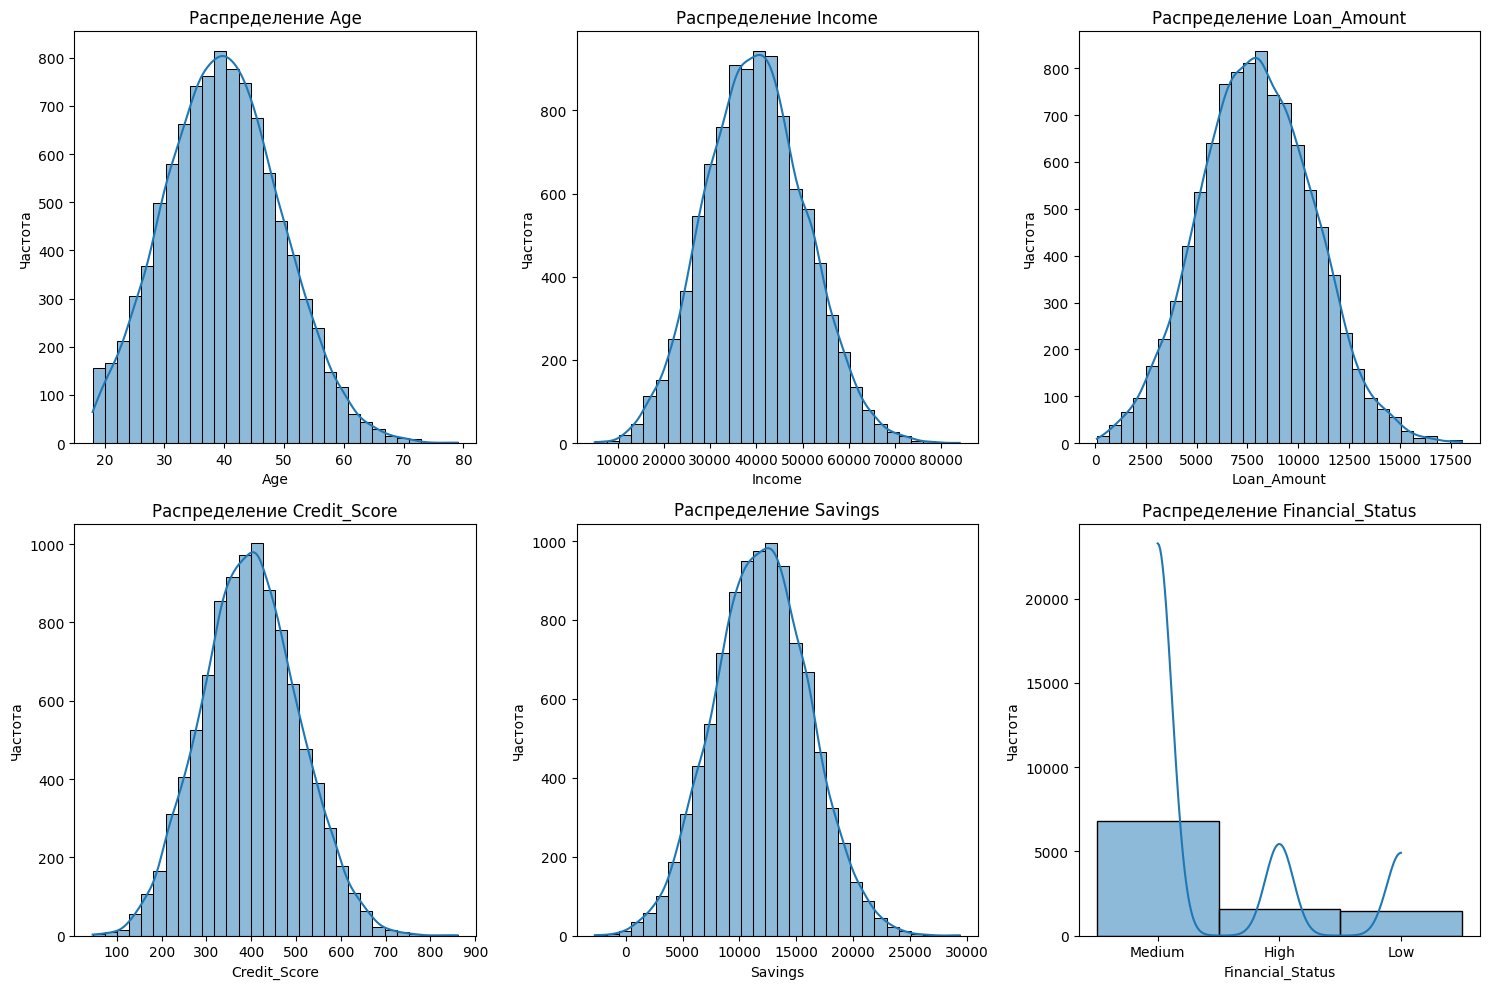

In [26]:
n_cols = 3 # Столбцы
n_rows = (len(data.columns) - 1 + n_cols - 1) // n_cols  # Строки

# Создание фигуры и сетки подграфиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Выравнивае массива подграфиков

# Визуализация распределение для каждого столбца
for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Распределение {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Частота")

# Удаление лишних подграфиков, 2 пустых подграфика
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Проверка, что элементы не налезают друг на друга
plt.show()


Визуализация зависимостей от Financial_Status

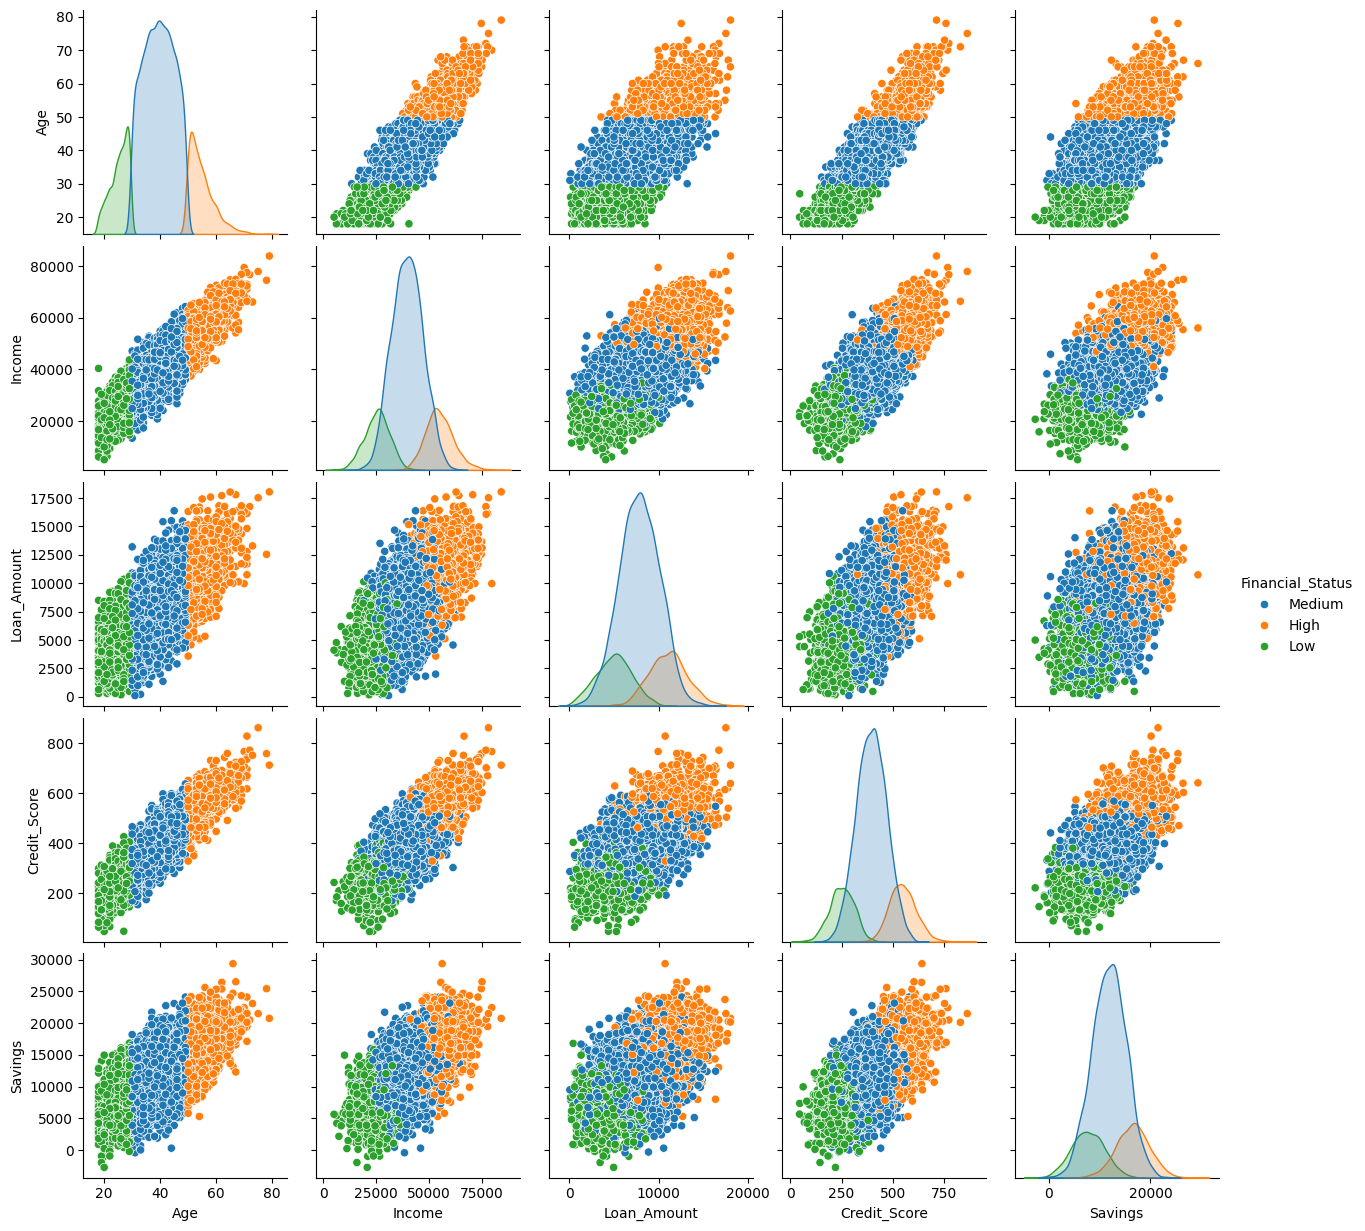

In [27]:
# Визуализация зависимостей
sns.pairplot(data, hue='Financial_Status')
plt.show()

Уже здесь видно, как Age разграничивает данные

Матрица Зависимостей (Матрица Корреляций)

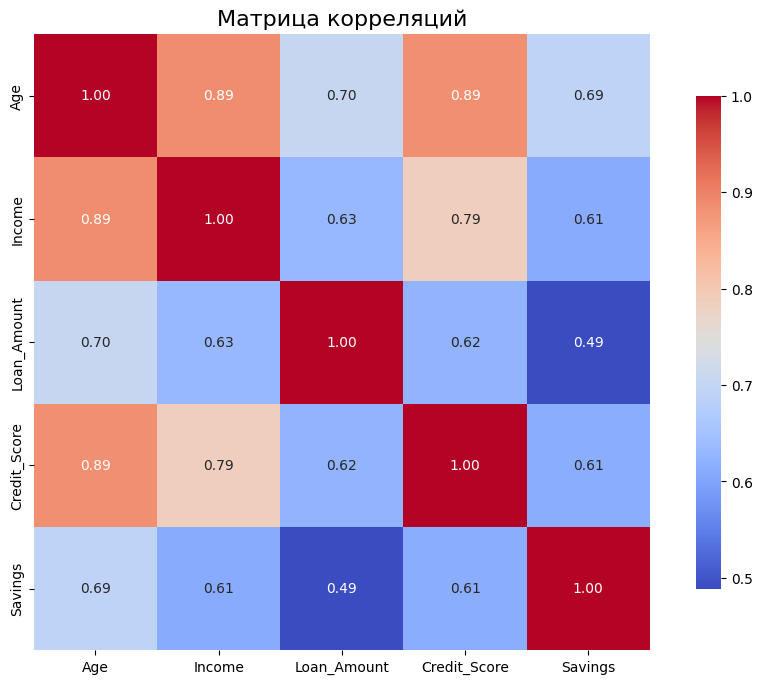

In [28]:
# Удалим категориальные столбцы для анализа
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Вычисление
correlation_matrix = numeric_data.corr()

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций', fontsize=16)
plt.show()


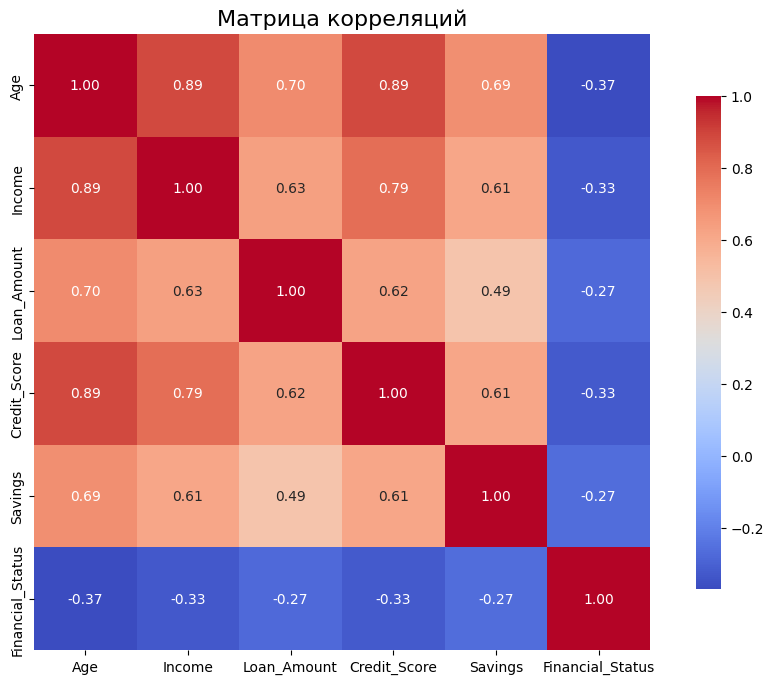

In [29]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию, чтобы провести анализ и не затронуть изначальные данные
data_correlation_matrix = data.copy()

# Преобразование категориальных данных
label_encoder = LabelEncoder()
data_correlation_matrix['Financial_Status'] = label_encoder.fit_transform(data['Financial_Status'])

# Вычисление корреляции
correlation_matrix = data_correlation_matrix.corr()

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций', fontsize=16)
plt.show()


In [30]:
# Словарь для хранения рамок для каждого значения Financial_Status
age_ranges = {}

for status in data['Financial_Status'].unique():
    # Фильтруем данные по текущему статусу
    filtered_data = data[data['Financial_Status'] == status]

    # Находим минимум и максимум в столбце Age
    min_age = filtered_data['Age'].min()
    max_age = filtered_data['Age'].max()

    # Сохраняем результаты в словаре
    age_ranges[status] = (min_age, max_age)

for status, (min_age, max_age) in age_ranges.items():
    print(f"Для статуса '{status}': Возрастные рамки: {min_age} - {max_age}")

Для статуса 'Medium': Возрастные рамки: 30 - 49
Для статуса 'High': Возрастные рамки: 50 - 79
Для статуса 'Low': Возрастные рамки: 18 - 29


Данные приведены в порядок и предварительно видно, что возраст слишком разграничен по статусу, и в обучении модели Возраст станет ненужным якорем, которым стоит пренебречь.

## 3. Построено и оценено качество бейзлайна

### Определяем признаки и целевую переменную

Прежде чем приступать к бейзлайну - определим Признаки и Целевую переменную

Для статуса 'Medium': Возрастные рамки: 30 - 49
Для статуса 'High': Возрастные рамки: 50 - 79
Для статуса 'Low': Возрастные рамки: 0 - 29

Он слишком разграничен.

Стоит пренебречь возрастом Age для обучения, иначе некорректно будет определяться статус в новых данных.

In [31]:
# Определяем признаки (X) и целевую переменную (y)
X = data[['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Savings']]
y = data['Financial_Status']

Для наглядности  рассмотрим модель Random Forest не исключая Age

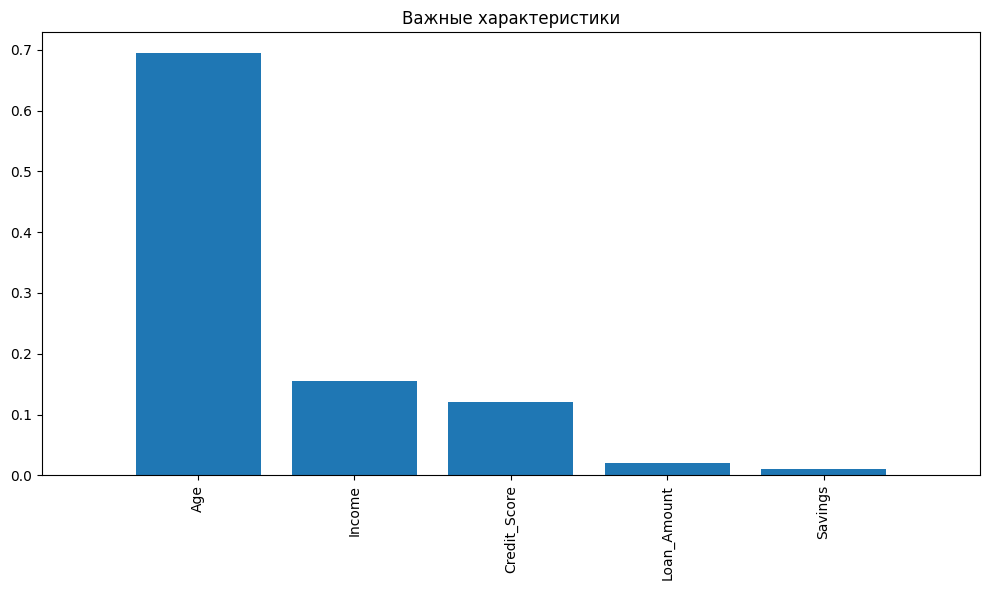

F1-Score: 1.0


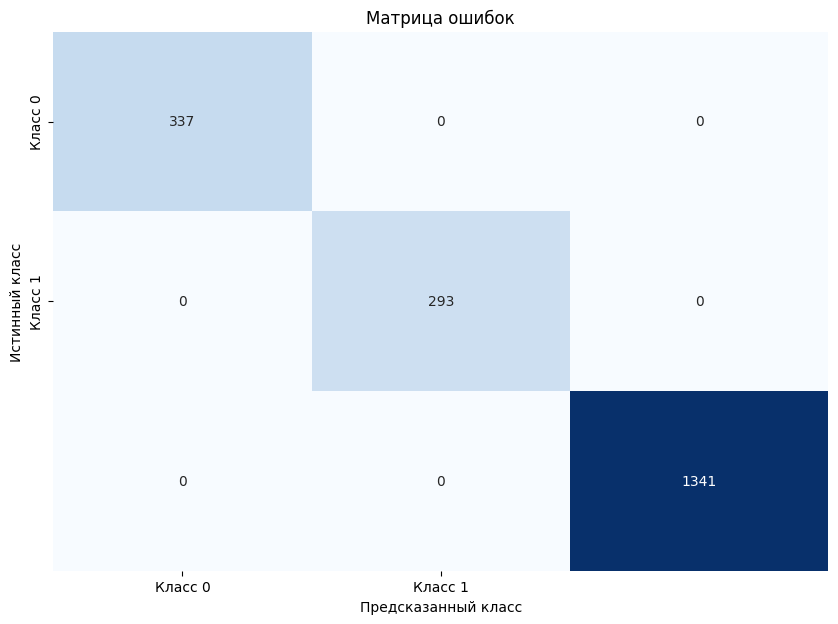

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Определяем признаки (X) и целевую переменную (y)
X = data[['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Savings']]
y = data['Financial_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Получаем важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Визуализация важностей признаков
plt.figure(figsize=(10, 6))
plt.title('Важные характеристики')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Прогнозирование
y_pred = model.predict(X_test)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score: {f1}')

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Класс 0', 'Класс 1'], yticklabels=['Класс 0', 'Класс 1'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()


Видно, что Age слишком сильно влияет

Устанавливаем нулевое значение в переменную Age, тем самым поставив эту переменную как незначащую, иначе модель слишком быстро привыкает к

Для статуса 'Medium': Возрастные рамки: 30 - 49

Для статуса 'High': Возрастные рамки: 50 - 79

Для статуса 'Low': Возрастные рамки: 0 - 29

И всегда приписывает соответсвующий статус к этим группам возрастов, в этих данных это работает, а вот в новых - будут несоответствия.

Проблема в том, что он имеет не 70% значимости, а буквально забирает всю значимость.

In [33]:
X.loc[:, 'Age'] = 0  # Устанавливаем нулевое значение для Age

### 3.1. Произведено измерение качества константного предсказания. 3.2. Бейзлайновая модель обучена на тренировочной выборке.

Мода - наиболее часто встречающееся решение. Это Безлайн Решение!

In [34]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Бейзлайновое предсказание (по моде)
most_frequent_class = data['Financial_Status'].mode()[0]
y_pred_baseline = [most_frequent_class] * len(y_test)

# F1-Score
f1 = f1_score(y_test, y_pred_baseline, average='weighted')
print(f'F1-Score: {f1}')

F1-Score: 0.5539392119127718


Это значение указывает на низкое качество предсказания из-за сильной несбалансированности в классах. 68% данных относятся к финансовому классу "Medium". Стоит улучшить модель, применив более сложные алгоритмы.

## 4. Построена более сложная модель с подбором гиперпараметров

4.1. Выбрана более сложная ML-модель. 4.2. Произведено измерение качества на отложенной выборке.

Используем Кросс-валидацию с использованием GridSearchCV

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Random Forest Будет лучше всего на 1/1000, а Переобучать приходится долго = Не стоит того.

In [37]:
# # # Нормализация данных (Нет смысла, На обучающей чуть-чуть повысится результат, а на тестовой просто поменяются Logistic Regression и K-Nearest Neighbors, да и то итоговый результат станет чуть хуже)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# #X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Используем DataFrame

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Словарь для хранения моделей
models = {
    # "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=3000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Словарь для хранения параметров для каждой модели
param_grids = {
    # "Random Forest": {
    #     'n_estimators': [50, 150, 200, 250, 300], # Количество деревьев в лесу
    #     'max_depth': [10, 20], # Максимальная глубина деревьев (На сколько могут делиться)
    #     'min_samples_split': [2, 5, 7, 10], # Минимальное количество объектов, необходимых для разделения узла
    #     'min_samples_leaf': [1, 2, 4] # Минимальное количество объектов в листьях (последние узлы дерева)
    # },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100, 1000], # Регуляризующий параметр (чем меньше значение (0.01), тем сильнее регуляризация (отсеивает менее важные признаки, предотвращения переобучения модели)) (добавляет дополнительное ограничение (штраф) к функции потерь)
        'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации для решения задачи liblinear (малым и средним объемом данных, эффективна для задач логистической регрессии), saga (быстрее, поддерживает L1 и L2 регуляризацию)
        'penalty': ['l1', 'l2'], # Тип регуляризации
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 15, 20, 25], # Максимальная глубина дерева (На сколько могут делиться)
        'min_samples_split': [2, 5, 10, 15], # Минимальное количество объектов для разделения узла
        'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10], # Минимальное количество объектов в листьях (Больше нет смысла))
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [1, 3, 5, 7, 10, 15], # Количество соседей, используемых для классификации (Больше = будет переобучение)
        'weights': ['uniform', 'distance'],  # Способ взвешивания соседей (равные веса uniform или пропорционально расстоянию distance)
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Алгоритмы для поиска соседей
        'leaf_size': [5, 10, 20, 30, 40], # Размер листа в KNN, который влияет на скорость поиска
    }
}

# Хранение лучших моделей и их F1-Score
best_models = {}
best_f1_scores = {}
train_f1_scores = {}  # Словарь для хранения F1-Score на обучающей выборке
training_times = {}  # Словарь для хранения времени обучения
best_params = {}  # Словарь для сохранения лучших гиперпараметров

# Подбор параметров для каждой модели
for model_name, model in models.items():
    print(f"Подбор параметров для {model_name}...")
    start_time = time.time()  # Время начала

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='f1_weighted', cv=5, verbose=3, refit=True)
    grid_search.fit(X_train, y_train)

    end_time = time.time()  # Время окончания
    training_time = end_time - start_time  # Время обучения

    # Сохраняем лучшие результаты
    best_models[model_name] = grid_search.best_estimator_

    # Оценка на обучающей выборке
    train_f1 = f1_score(y_train, best_models[model_name].predict(X_train), average='weighted')
    train_f1_scores[model_name] = train_f1

    # Оценка на тестовой выборке
    test_f1 = f1_score(y_test, best_models[model_name].predict(X_test), average='weighted')
    best_f1_scores[model_name] = test_f1

    training_times[model_name] = training_time  # Сохраняем время обучения
    best_params[model_name] = grid_search.best_params_  # Сохраняем лучшие гиперпараметры

    print(f"Лучшие гиперпараметры для {model_name}: {grid_search.best_params_}")
    print(f'F1-Score на обучающей выборке для {model_name}: {train_f1}')
    print(f'F1-Score на тестовой выборке для {model_name}: {test_f1}')
    print()


Подбор параметров для Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.876 total time=   0.2s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.876 total time=   0.2s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.890 total time=   0.2s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.883 total time=   0.2s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.883 total time=   0.2s
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.045 total time=   4.9s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.045 total time=   3.3s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.045 total time=   3.4s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.045 total time=   4.0s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.045 total time=   4.4s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.617 total tim

В Нормализации данных в данном случае Нет смысла. На обучающей модели лишь чуть повысится результат, а на тестовой просто поменяются Logistic Regression и K-Nearest Neighbors результаты, а итоговый результат самой лучшей модели станет чуть хуже по сравнению с лучшей моделью без нормализации данных.)

Лучшие гиперпараметры для каждой модели

In [38]:
print("\nЛучшие гиперпараметры для каждой модели:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Лучшие гиперпараметры для каждой модели:
Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 15, 'weights': 'uniform'}


Время обучения

In [39]:
print("Время обучения моделей:")
for model_name, time_taken in training_times.items():
    print(f"{model_name}: {time_taken:.2f} секунд")

Время обучения моделей:
Logistic Regression: 205.40 секунд
Decision Tree: 66.10 секунд
K-Nearest Neighbors: 142.78 секунд


Лучшие модели и F1-Score

In [40]:
print("\nЛучшие модели и F1-Score (Обучающая выборка):")
for model_name, f1 in train_f1_scores.items():
    print(f"{model_name}: {f1}")

print("\nЛучшие модели и F1-Score (Тестовая выборка):")
for model_name, f1 in best_f1_scores.items():
    print(f"{model_name}: {f1}")


Лучшие модели и F1-Score (Обучающая выборка):
Logistic Regression: 0.8828481058824307
Decision Tree: 0.8771083378860881
K-Nearest Neighbors: 0.858522348261294

Лучшие модели и F1-Score (Тестовая выборка):
Logistic Regression: 0.8965928156535597
Decision Tree: 0.8846284455380888
K-Nearest Neighbors: 0.8440391696328147


Переобучение

Если F1-Score на обучающей выборке выше на 0.1 или более: это указывает на переобучение. Модель хорошо работает на обучающих данных, но плохо на тестовых.

Если F1-Score на тестовой выборке выше на 0.1 или более: это может указывать на недообучение. Модель может быть недостаточно сложной, чтобы уловить закономерности в данных.

Данные модели обучены в пределах нормы!

Графическое распределение результатов

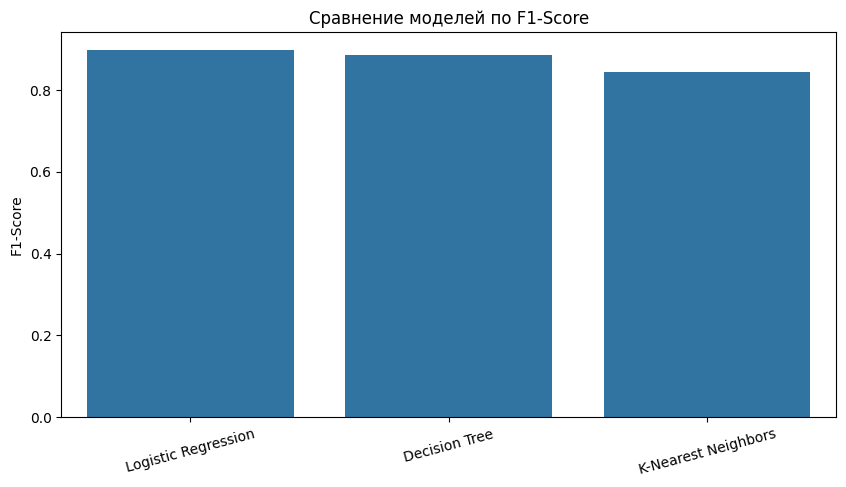

In [41]:
# Визуализация результатов
plt.figure(figsize=(10, 5))
sns.barplot(x=list(best_f1_scores.keys()), y=list(best_f1_scores.values()))
plt.ylabel('F1-Score')
plt.title('Сравнение моделей по F1-Score')
plt.xticks(rotation=15)
plt.show()

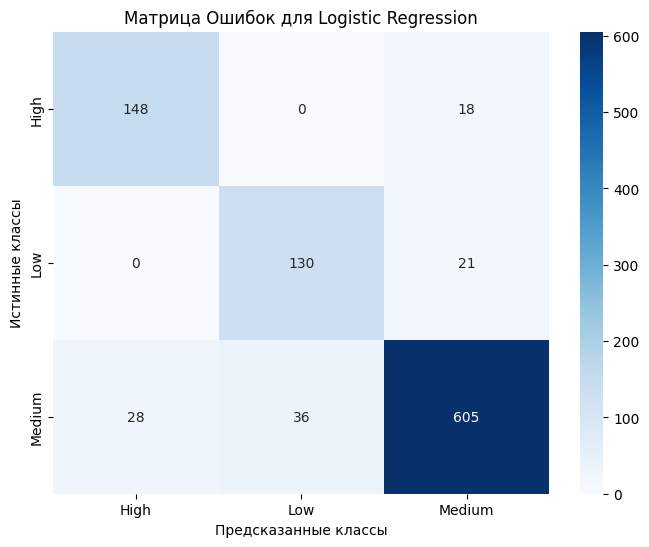

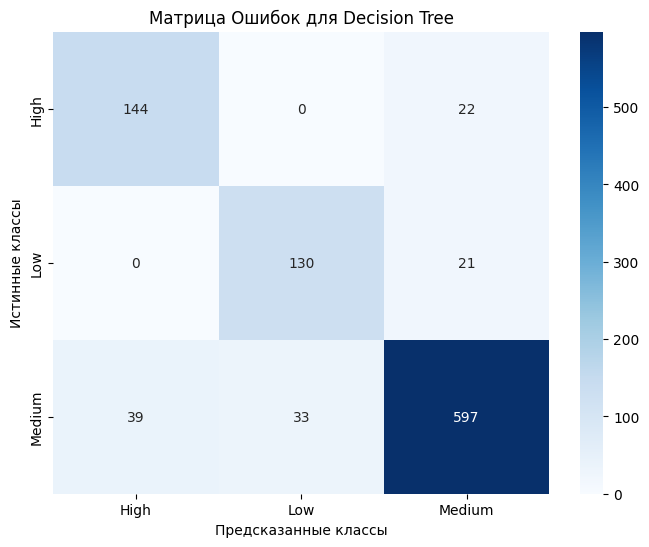

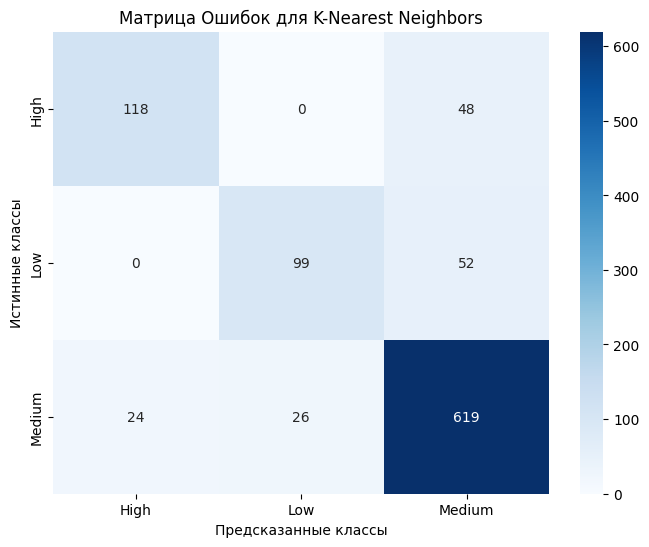

In [42]:
# Визуализация матриц ошибок
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Матрица Ошибок для {model_name}')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.show()


В данном случае, лучше всего себя показала Logistic Regression. Ее стоит сохранить и использовать в будущем для анализа и прогнозирования.

## Сохранение модели

Сохраняем полученную лучшую модель

In [43]:
from joblib import dump

In [44]:
# Сохранение лучшей модели по F1-Score
best_model_name = max(best_f1_scores, key=best_f1_scores.get)
best_model = best_models[best_model_name]
dump(best_model, 'finance_model.joblib')

print(f"Лучшая модель {best_model_name} сохранена как 'finance_model.joblib'")

Лучшая модель Logistic Regression сохранена как 'finance_model.joblib'


# Проверка на новых входных данных (Здесь или в отдельной программе)

Ссылка на гит с программой и прочими файлами:
https://github.com/LibrarySDW/FinancialStatusApp

In [45]:
from joblib import load

# Загрузка модели из файла
loaded_model = load('finance_model.joblib')
print("Модель успешно загружена!")

Модель успешно загружена!


Для примера протестируем на наборе: 22 26114 5445 65 5320

In [46]:
sample_data = pd.DataFrame([[22, 26114, 5445, 65, 5320]],
                            columns=['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Savings'])

predicted_status = loaded_model.predict(sample_data)
print("Предсказанный финансовый статус:", predicted_status)

Предсказанный финансовый статус: ['Low']


In [47]:
while True:
    input_values = input("Введите возраст, доход, сумму кредита, кредитный рейтинг и сбережения через пробел: ")

    try:
        age, income, loan_amount, credit_score, savings = map(float, input_values.split())

        if age < 0 or income < 0 or loan_amount < 0 or credit_score < 0 or savings < 0:
            print("Все значения должны быть неотрицательными. Попробуйте снова.")
            continue

        break  # Если все проверки пройдены, выход из цикла

    except ValueError:
        print("Ошибка ввода. Введите Числовые значения, разделенные пробелами.")

sample_data = pd.DataFrame([[age, income, loan_amount, credit_score, savings]],
                            columns=['Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Savings'])

predicted_status = loaded_model.predict(sample_data)
print("Предсказанный финансовый статус:", predicted_status)


Введите возраст, доход, сумму кредита, кредитный рейтинг и сбережения через пробел: 22 26114 5445 65 5320
Предсказанный финансовый статус: ['Low']
